导入所需包

In [1]:
import numpy as np
import pandas as pd
import os
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

导入数据集

In [2]:
train_labels = pd.read_csv('input/train_labels.csv')
train_sequences = pd.read_csv('input/train_sequences.csv')
test_sequences = pd.read_csv('input/test_sequences.csv')
valid_labels = pd.read_csv('input/validation_labels.csv')
valid_sequences = pd.read_csv('input/validation_sequences.csv')
submission = pd.read_csv('input/sample_submission.csv')

In [3]:
train_labels.head()

,ID,resname,resid,x_1,y_1,z_1
0,1SCL_A_1,G,1,13.760,-25.974001,0.102
1,1SCL_A_2,G,2,9.310,-29.638000,2.669
2,1SCL_A_3,G,3,5.529,-27.813000,5.878
3,1SCL_A_4,U,4,2.678,-24.900999,9.793
4,1SCL_A_5,G,5,1.827,-20.136000,11.793


In [4]:
train_sequences.head()

,target_id,sequence,temporal_cutoff,description,all_sequences
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,1995-06-03,24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...,>1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,1995-09-15,P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID,>1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*AP*UP*AP*A...
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,1995-12-07,THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...,">1HMH_1|Chains A, C, E|HAMMERHEAD RIBOZYME-RNA..."


In [5]:
test_sequences.head()

,target_id,sequence,temporal_cutoff,description,all_sequences
0,R1107,GGGGGCCACAGCAGAAGCGUUCACGUCGCAGCCCCUGUCAGCCAUU...,2022-05-28,CPEB3 ribozyme\nHuman\nhuman CPEB3 HDV-like ri...,>7QR4_1|Chain A|U1 small nuclear ribonucleopro...
1,R1108,GGGGGCCACAGCAGAAGCGUUCACGUCGCGGCCCCUGUCAGCCAUU...,2022-05-27,CPEB3 ribozyme\nChimpanzee\nChimpanzee CPEB3 H...,">7QR3_1|Chains A, B|U1 small nuclear ribonucle..."
2,R1116,CGCCCGGAUAGCUCAGUCGGUAGAGCAGCGGCUAAAACAGCUCUGG...,2022-06-04,Cloverleaf RNA\nPoliovirus\nCrystal Structure ...,">8S95_1|Chain A[auth C]|Lysine tRNA scaffold,P..."
3,R1117v2,UUGGGUUCCCUCACCCCAAUCAUAAAAAGG,2022-06-03,PreQ1 class I type III riboswitch\nK. pneumoni...,">8FZA_1|Chains A, B|PreQ1 Riboswitch (30-MER)|..."
4,R1126,GGAAUCUCGCCCGAUGUUCGCAUCGGGAUUUGCAGGUCCAUGGAUU...,2022-06-11,Traptamer\nSynthetic\nAdditional Information: ...,>8TVZ_1|Chain A[auth C]|RNA (363-MER)|syntheti...


In [6]:
valid_labels.head()

,ID,resname,resid,x_1,y_1,z_1,x_2,y_2,z_2,x_3,...,z_37,x_38,y_38,z_38,x_39,y_39,z_39,x_40,y_40,z_40
0,R1107_1,G,1,-5.499,8.520000,8.605000,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
1,R1107_2,G,2,-5.826,10.453000,14.010000,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
2,R1107_3,G,3,-5.849,14.768000,17.584999,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
3,R1107_4,G,4,-5.784,19.985001,18.666000,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
4,R1107_5,G,5,-5.755,25.533001,17.132999,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18


In [7]:
valid_sequences.head()

,target_id,sequence,temporal_cutoff,description,all_sequences
0,R1107,GGGGGCCACAGCAGAAGCGUUCACGUCGCAGCCCCUGUCAGCCAUU...,2022-05-28,CPEB3 ribozyme\nHuman\nhuman CPEB3 HDV-like ri...,>7QR4_1|Chain A|U1 small nuclear ribonucleopro...
1,R1108,GGGGGCCACAGCAGAAGCGUUCACGUCGCGGCCCCUGUCAGCCAUU...,2022-05-27,CPEB3 ribozyme\nChimpanzee\nChimpanzee CPEB3 H...,">7QR3_1|Chains A, B|U1 small nuclear ribonucle..."
2,R1116,CGCCCGGAUAGCUCAGUCGGUAGAGCAGCGGCUAAAACAGCUCUGG...,2022-06-04,Cloverleaf RNA\nPoliovirus\nCrystal Structure ...,">8S95_1|Chain A[auth C]|Lysine tRNA scaffold,P..."
3,R1117v2,UUGGGUUCCCUCACCCCAAUCAUAAAAAGG,2022-06-03,PreQ1 class I type III riboswitch\nK. pneumoni...,">8FZA_1|Chains A, B|PreQ1 Riboswitch (30-MER)|..."
4,R1126,GGAAUCUCGCCCGAUGUUCGCAUCGGGAUUUGCAGGUCCAUGGAUU...,2022-06-11,Traptamer\nSynthetic\nAdditional Information: ...,>8TVZ_1|Chain A[auth C]|RNA (363-MER)|syntheti...


数据处理

In [8]:
train_labels['target'] = train_labels['ID'].str.rsplit('_', n=1).str[0]
valid_labels['target'] = valid_labels['ID'].str.rsplit('_', n=1).str[0]

train = train_sequences.merge(train_labels, how='left', left_on='target_id', right_on='target')
validation = valid_sequences.merge(valid_labels, how='left', left_on='target_id', right_on='target')

train['temporal_cutoff'] = pd.to_datetime(train['temporal_cutoff']).astype('int64') 
test_sequences['temporal_cutoff'] = pd.to_datetime(test_sequences['temporal_cutoff']).astype('int64')
validation['temporal_cutoff'] = pd.to_datetime(validation['temporal_cutoff']).astype('int64')

In [9]:
submission['target'] = submission['ID'].str.rsplit('_', n=1).str[0]  # 提取目标RNA名称
test = test_sequences.merge(submission, how='left', left_on='target_id', right_on='target')

In [10]:
# 生成序列的长度
train['seq_length'] = train['sequence'].str.len()
test['seq_length'] = test['sequence'].str.len()
validation['seq_length'] = validation['sequence'].str.len()

In [11]:
dataframes = [train, validation, test]

shifts = {
    'prev_res': 1,       # 前一个残基
    'next_res': -1,      # 后一个残基
    'prev_two_res': 2,   # 前两个残基
    'next_two_res': -2   # 后两个残基
}

for df in dataframes:
    for col_name, shift_value in shifts.items():
        df[col_name] = df.groupby('target_id')['resname'].shift(shift_value)

for df in dataframes:
    for col in shifts.keys():
        df[col] = df[col].fillna('None')  # 或使用其他合适的填充值

In [12]:
# 核苷酸组成特征（碱基组成特征）
def add_nucleotide_composition(df):
    df['GC_content'] = df['sequence'].apply(lambda x: (x.count('G') + x.count('C'))/len(x))
    df['AU_content'] = df['sequence'].apply(lambda x: (x.count('A') + x.count('U'))/len(x))
    df['G_content'] = df['sequence'].apply(lambda x: x.count('G')/len(x))
    df['A_content'] = df['sequence'].apply(lambda x: x.count('A')/len(x))
    df['C_content'] = df['sequence'].apply(lambda x: x.count('C')/len(x))
    df['U_content'] = df['sequence'].apply(lambda x: x.count('U')/len(x))
    return df

In [13]:
# 局部结构复杂度
def add_local_complexity(df):
    def calc_local_complexity(seq, window=5):
        result = []
        for i in range(len(seq)):
            start = max(0, i-window)
            end = min(len(seq), i+window+1)
            local_seq = seq[start:end]
            # 计算局部GC含量
            local_gc = (local_seq.count('G') + local_seq.count('C'))/len(local_seq)
            result.append(local_gc)
        return result
    
    df['local_complexity'] = df['sequence'].apply(calc_local_complexity)
    return df

In [14]:
# 堆叠能量特征
def add_stacking_energy(df):
    # 定义堆叠能量参数 (kcal/mol)
    stacking_energy = {
        'AA': -0.93, 'AC': -2.24, 'AG': -1.30, 'AU': -1.10,
        'CA': -2.11, 'CC': -3.36, 'CG': -2.36, 'CU': -2.08,
        'GA': -1.41, 'GC': -2.44, 'GG': -1.53, 'GU': -1.80,
        'UA': -0.90, 'UC': -1.70, 'UG': -1.80, 'UU': -0.80
    }
    
    def calc_avg_stacking(seq):
        if len(seq) <= 1:
            return 0
        energy = 0
        pairs = 0
        for i in range(len(seq)-1):
            dinuc = seq[i:i+2]
            if dinuc in stacking_energy:
                energy += stacking_energy[dinuc]
                pairs += 1
        return energy/pairs if pairs > 0 else 0
    
    df['avg_stacking_energy'] = df['sequence'].apply(calc_avg_stacking)
    return df

In [15]:
# 结构模块特征
def add_structural_motifs(df):
    # 常见的RNA结构模块模式
    motifs = {
        'tetraloop_GNRA': r'G[AGUC]RA',
        'tetraloop_UNCG': r'U[AGUC]CG',
        'kink_turn': r'GA[AGUC]{2}A[AGUC]A',
        'C_loop': r'CCNN[AGUC]{5,7}GG'
    }
    
    import re
    for motif_name, pattern in motifs.items():
        df[f'has_{motif_name}'] = df['sequence'].apply(
            lambda x: 1 if re.search(pattern, x) else 0)
    
    return df

In [16]:
# 应用特征工程
for df in [train, validation, test]:
    df = add_nucleotide_composition(df)  # 添加核苷酸组成特征
    df = add_local_complexity(df)  # 添加局部结构复杂度特征
    df = add_stacking_energy(df)   # 添加堆叠能量特征
    df = add_structural_motifs(df)  # 添加结构模块特征

In [17]:
categorical_columns = ['ID', 'target_id', 'description','all_sequences','target','resname',
                       'prev_res','next_res','prev_two_res','next_two_res','GC_content', 'AU_content', 
                       'G_content', 'A_content','C_content', 'U_content', 'local_complexity', 'avg_stacking_energy',
                       'has_tetraloop_GNRA', 'has_tetraloop_UNCG', 'has_kink_turn','has_C_loop']



配置编码器

In [18]:
# 从sklearn.preprocessing模块导入LabelEncoder类，LabelEncoder用于将分类变量转换为数值形式（0, 1, 2...）
from sklearn.preprocessing import LabelEncoder

# 初始化一个空字典，用于存储每个分类特征的编码器
label_encoders = {}

for col in categorical_columns:
    # train[col].astype(str): 将列值转换为字符串类型
    # .fillna('NA'): 用'NA'填充缺失值
    train[col] = train[col].astype(str).fillna('NA')

    # 创建编码器实例
    le = LabelEncoder()
    # 训练编码器并将分类值转换为数值形式
    train[col] = le.fit_transform(train[col])
    # 将编码器保存到字典中，以列名为键
    label_encoders[col] = le

for col in categorical_columns:
    # 与训练集类似的操作，但应用于测试数据
    # test[col].astype(str).fillna('missing'): 将列转为字符串并用'missing'填充缺失值
    test[col] = test[col].astype(str).fillna('missing')
    
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

# 对验证集的分类变量进行编码
for col in categorical_columns:
    # 与训练集类似的操作，但应用于验证数据
    validation[col] = validation[col].astype(str).fillna('none')
    
    le = LabelEncoder()
    validation[col] = le.fit_transform(validation[col])
    label_encoders[col] = le
# 注意：
# 字典只会显示LabelEncoder对象的引用，而不会显示实际的编码映射或转换后的数值。这是Python对象默认的字符串表示形式导致的。

定义训练集和训练目标

In [19]:
# 这行代码定义了将用于模型训练的特征变量列表，包含以下特征：
features = ['temporal_cutoff', 'resname', 'resid', 'seq_length', 'target_id','ID','description','all_sequences',
            'prev_res','next_res','prev_two_res','next_two_res','GC_content', 'AU_content', 
                       'G_content', 'A_content','C_content', 'U_content', 'local_complexity', 'avg_stacking_energy',
                       'has_tetraloop_GNRA', 'has_tetraloop_UNCG', 'has_kink_turn','has_C_loop']

# 这行定义了模型的预测目标：这是一个包含3个坐标的列表，表示三维空间中的点
coord_targets = ['x_1','y_1','z_1']

In [20]:
# 计算当前rna目标序列d0值
# seq_len: RNA序列的长度
# 函数根据序列长度返回不同的d0值
def calculate_d0(seq_len):
    if seq_len > 30:
        # 如果序列长度大于30，使用公式计算：0.6*(seq_len-0.5)**0.5-2.5
        # 这是一个平方根函数，随着序列变长，d0值会增加但增速会减慢
        return 0.6*(seq_len-0.5)**0.5-2.5
    else:
        # 当序列长度≤30时，根据不同长度范围返回固定值：
        if seq_len < 12:
            return 0.3
        if seq_len < 16:
            return 0.4
        if seq_len < 20:
            return 0.5
        if seq_len < 24:
            return 0.6
        else:   
            return 0.7
# 这种分段设计表明d0值与RNA序列长度有关，对于预测算法或评估可能很重要
# 随着序列长度增加，d0值也相应增加，可能反映了更长序列需要更灵活的评估标准

# 计算当前rna目标序列di值
def calculate_dis(x1, y1, z1, x2, y2, z2):
    return ((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)**0.5

# calculate_tm_score函数计算预测RNA结构与目标结构之间的TM-score（Template Modeling score）
# 这是评估RNA结构预测准确性的重要指标
# pred: 包含预测坐标的数据框
# target: 包含目标（真实）坐标的数据框
def calculate_tm_score(pred, target):
    tm_score = []   # 初始化一个空列表tm_score存储每个RNA序列的TM-score
    cur_id = ''     # 初始化cur_id为空字符串，用于跟踪当前处理的RNA序列ID
    for i in range(len(pred)):
        # 如果遇到新序列就把上一个序列tm-score存起来，并重置其他记录
        if pred['target_id'][i] != cur_id:   # 当遇到新序列时（当前行的target_id与之前不同）：
            if cur_id != '':
                # 如果不是第一个序列（cur_id不为空），将上一个序列的累计得分除以序列长度，得到TM-score并保存
                tm_score.append(cur_id_score/seq_len)
            seq_len = pred['seq_length'][i]     # 获取当前序列的长度
            d0=calculate_d0(seq_len)            # 根据序列长度计算d0值（使用上一个函数中的calculate_d0）
            # 计算当前行（残基位置）的得分：1/(1+(距离²/d0²))
            cur_id_score = (1/(1+(calculate_dis(pred['x_1'][i],pred['y_1'][i],pred['z_1'][i],target['x_1'][i],target['y_1'][i],target['z_1'][i]))**2/d0**2))
            cur_id = pred['target_id'][i]       # 更新当前处理的序列ID
            
        # 特殊处理最后一个样本，取所有tm-score均值作为输出
        # 如果是数据集的最后一行：添加最后一个序列的得分，然后返回所有序列TM-score的平均值
        # 否则：累加当前残基位置的得分
        else :
            if i == len(pred)-1:
                tm_score.append(cur_id_score/seq_len)
                return np.mean(tm_score)
            else:
                cur_id_score += (1/(1+(calculate_dis(pred['x_1'][i],pred['y_1'][i],pred['z_1'][i],target['x_1'][i],target['y_1'][i],target['z_1'][i]))**2/d0**2))

配置训练模型

In [21]:
# 这段代码是训练三个机器学习模型，分别预测空间中的x、y、z三个坐标值
models = {}   # 创建一个空字典，用来存放训练好的模型，字典的键将是坐标名('x_1'、'y_1'、'z_1')，值是对应的训练好的模型
for coord in coord_targets: 
    # 这个循环会依次处理'x_1'、'y_1'、'z_1'三个坐标
    print(f'Training model for {coord}...')
    model = xgb.XGBRegressor(             # XGBRegressor是一种强大的机器学习模型，适合预测数值（比如坐标值）
        objective='reg:squarederror',     # 使用均方误差作为优化目标（让预测值尽量接近真实值）
        n_estimators=1000,                 # 模型会建立1000棵小树，它们一起工作做预测（想象成1000个专家一起投票）
        max_depth=7,                      # 每棵树最多有7层（决定了模型的复杂度）
        learning_rate=0.1,                # 学习步长，值小时学习更谨慎但需要更多树（类似于人学习新知识时的谨慎程度）
        subsample=0.8,                    # 随机取样比例：每棵树随机使用80%的训练数据（防止过度拟合）
        colsample_bytree=0.8,             # 列采样比例：每棵树随机使用80%的特征（增加模型多样性）
        # min_child_weight=3,               # 控制过拟合的参数，值越大越保守（类似于人学习时的谨慎程度）
    )
    
    mean_val = train[coord].mean()        # 计算当前坐标的均值，用于填充缺失值（如果有的话）
    valid_idx = train[coord].notna()      # 找出坐标不是缺失值(列不为空)的行（创建了一个布尔数组），只用它们训练
    train[coord].fillna(mean_val, inplace=True)   # 用平均值填充缺失的坐标值，但注意这里填充后实际并没有使用这些填充的值

    # model.fit(...)：训练模型
    # train[valid_idx][features]：只用非缺失值的行，选取特征列作为输入
    # train[valid_idx][coord]：对应的坐标值作为预测目标
    model.fit(train[valid_idx][features], train[valid_idx][coord])

    models[coord] = model                 # 将训练好的模型保存到字典中，以坐标名称为键

# 这段代码的关键是它为每个坐标（x、y、z）创建了一个单独的预测模型，并且只使用有效数据（非缺失值）来训练模型

Training model for x_1...


C:\Windows\Temp\ipykernel_11728\4183638333.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[coord].fillna(mean_val, inplace=True)   # 用平均值填充缺失的坐标值，但注意这里填充后实际并没有使用这些填充的值


Training model for y_1...


C:\Windows\Temp\ipykernel_11728\4183638333.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[coord].fillna(mean_val, inplace=True)   # 用平均值填充缺失的坐标值，但注意这里填充后实际并没有使用这些填充的值


Training model for z_1...


C:\Windows\Temp\ipykernel_11728\4183638333.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[coord].fillna(mean_val, inplace=True)   # 用平均值填充缺失的坐标值，但注意这里填充后实际并没有使用这些填充的值


验证模型

In [22]:
validation = validation[['temporal_cutoff', 'resname', 'resid', 'seq_length', 'target_id','ID','description','all_sequences',
                         'prev_res','next_res','prev_two_res','next_two_res','GC_content', 'AU_content', 
                       'G_content', 'A_content','C_content', 'U_content', 'local_complexity', 'avg_stacking_energy',
                       'has_tetraloop_GNRA', 'has_tetraloop_UNCG', 'has_kink_turn','has_C_loop'] +['x_1','y_1','z_1']]
validation.head()

,temporal_cutoff,resname,resid,seq_length,target_id,ID,description,all_sequences,prev_res,next_res,...,U_content,local_complexity,avg_stacking_energy,has_tetraloop_GNRA,has_tetraloop_UNCG,has_kink_turn,has_C_loop,x_1,y_1,z_1
0,1653696000000000000,2,1,69,0,0,7,2,3,2,...,1,9,9,0,1,0,0,-5.499,8.520000,8.605000
1,1653696000000000000,2,2,69,0,11,7,2,2,2,...,1,9,9,0,1,0,0,-5.826,10.453000,14.010000
2,1653696000000000000,2,3,69,0,22,7,2,2,2,...,1,9,9,0,1,0,0,-5.849,14.768000,17.584999
3,1653696000000000000,2,4,69,0,33,7,2,2,2,...,1,9,9,0,1,0,0,-5.784,19.985001,18.666000
4,1653696000000000000,2,5,69,0,44,7,2,2,1,...,1,9,9,0,1,0,0,-5.755,25.533001,17.132999


In [23]:
valid_prediction = validation.copy()
for coord in coord_targets:
    valid_prediction[coord] = models[coord].predict(validation[features])
valid_prediction.head()

,temporal_cutoff,resname,resid,seq_length,target_id,ID,description,all_sequences,prev_res,next_res,...,U_content,local_complexity,avg_stacking_energy,has_tetraloop_GNRA,has_tetraloop_UNCG,has_kink_turn,has_C_loop,x_1,y_1,z_1
0,1653696000000000000,2,1,69,0,0,7,2,3,2,...,1,9,9,0,1,0,0,-10.562522,89.101929,111.511246
1,1653696000000000000,2,2,69,0,11,7,2,2,2,...,1,9,9,0,1,0,0,-10.662208,86.972404,107.534691
2,1653696000000000000,2,3,69,0,22,7,2,2,2,...,1,9,9,0,1,0,0,-14.013841,85.700874,102.770615
3,1653696000000000000,2,4,69,0,33,7,2,2,2,...,1,9,9,0,1,0,0,-13.291576,82.225822,102.823044
4,1653696000000000000,2,5,69,0,44,7,2,2,1,...,1,9,9,0,1,0,0,-13.366677,80.006676,96.059631


In [24]:
calculate_tm_score(validation, valid_prediction)

0.001318134876687638

绘制图像

In [25]:
import matplotlib.pyplot as plt

def plot_rna(pred, target):
    # 获取第一个RNA分子的ID
    first_rna_id = pred['target_id'].unique()[0]
    rna_name = valid_sequences['target_id'].unique()[0]
    
    # 筛选出第一条RNA的所有残基并按残基ID排序
    pred_rna = pred[pred['target_id'] == first_rna_id].sort_values('resid')
    target_rna = target[target['target_id'] == first_rna_id].sort_values('resid')
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # 绘制预测结构 (蓝色)
    ax.plot(pred_rna['x_1'], pred_rna['y_1'], pred_rna['z_1'], 'b-o', linewidth=2, markersize=4, label='prediction')
    
    # 绘制实际结构 (红色)
    ax.plot(target_rna['x_1'], target_rna['y_1'], target_rna['z_1'], 'r-o', linewidth=2, markersize=4, label='truth')
    
    # 设置图形标题和轴标签
    ax.set_title(f'RNA - {rna_name}', fontsize=14)
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.set_zlabel('Z', fontsize=12)
    
    # 添加图例
    ax.legend(fontsize=12)
    
    # 调整视角以便更好地观察结构
    ax.view_init(elev=20, azim=30)
    
    # 设置坐标轴比例相等，使结构不变形
    max_range = np.array([
        max(pred_rna['x_1'].max(), target_rna['x_1'].max()) - min(pred_rna['x_1'].min(), target_rna['x_1'].min()),
        max(pred_rna['y_1'].max(), target_rna['y_1'].max()) - min(pred_rna['y_1'].min(), target_rna['y_1'].min()),
        max(pred_rna['z_1'].max(), target_rna['z_1'].max()) - min(pred_rna['z_1'].min(), target_rna['z_1'].min())
    ]).max() / 2.0
    
    # 计算预测和真实结构的中心坐标（取平均值）
    mid_x = (pred_rna['x_1'].mean() + target_rna['x_1'].mean()) / 2
    mid_y = (pred_rna['y_1'].mean() + target_rna['y_1'].mean()) / 2
    mid_z = (pred_rna['z_1'].mean() + target_rna['z_1'].mean()) / 2

    # 设置轴的显示范围，确保两个结构居中且保持相同的比例
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    # 自动调整图表布局，减少边距并防止元素被截断
    plt.tight_layout()

    # 显示图表
    plt.show()


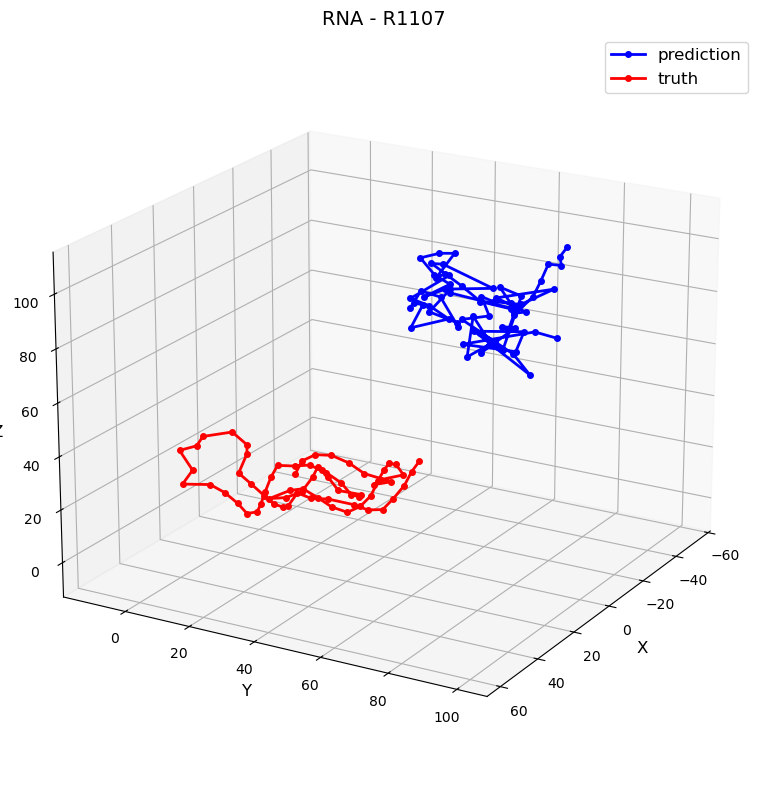

In [27]:
plot_rna(valid_prediction, validation)

测试模型

In [28]:
# 这行代码从test数据框中选择了特定的列，并将结果重新赋值给test变量，这意味着测试数据集现在只保留了这些指定的列
test = test[['temporal_cutoff', 'resname', 'resid', 'seq_length', 'target_id','ID','description','all_sequences',
             'prev_res','next_res','prev_two_res','next_two_res','GC_content', 'AU_content', 
                       'G_content', 'A_content','C_content', 'U_content', 'local_complexity', 'avg_stacking_energy',
                       'has_tetraloop_GNRA', 'has_tetraloop_UNCG', 'has_kink_turn','has_C_loop']]

In [29]:
# 创建test数据框的完整副本，并将其赋值给test_predictions
# 这样做的目的是保留原始测试数据，同时在副本上添加预测结果
test_predictions = test.copy()
for coord in coord_targets:
    test_predictions[coord] = models[coord].predict(test[features])
    
# 展示部分预测
print("Test predictions sample:")
test_predictions[['ID', 'resname', 'resid', 'x_1', 'y_1', 'z_1']].head()

Test predictions sample:


,ID,resname,resid,x_1,y_1,z_1
0,0,2,1,-10.562522,89.101929,111.511246
1,11,2,2,-10.662208,86.972404,107.534691
2,22,2,3,-14.013841,85.700874,102.770615
3,33,2,4,-13.291576,82.225822,102.823044
4,44,2,5,-13.366677,80.006676,96.059631


In [30]:
# 简单随便复制几份
for i in range(2, 6):
    test_predictions[f'x_{i}'] = test_predictions['x_1']
    test_predictions[f'y_{i}'] = test_predictions['y_1']
    test_predictions[f'z_{i}'] = test_predictions['z_1']

In [31]:
submission[['x_1','y_1','z_1','x_2','y_2','z_2','x_3','y_3','z_3','x_4','y_4','z_4','x_5','y_5','z_5']] = test_predictions[['x_1','y_1','z_1','x_2','y_2','z_2','x_3','y_3','z_3','x_4','y_4','z_4','x_5','y_5','z_5']] 

In [32]:
submission.to_csv('submission.csv', index=False)